# Free Fall

The state vector:
$$\textbf{x} =  \begin{bmatrix}
x\\ 
y\\ 
\dot{y}\\
\dot{z}\\
\end{bmatrix}$$

dynamic of the state $\textbf{x}$

$$\mathbf{ \dot{x} } = \begin{bmatrix}
\dot{y}\\ 
\dot{z}\\ 
0 \\
-mg
\end{bmatrix} $$



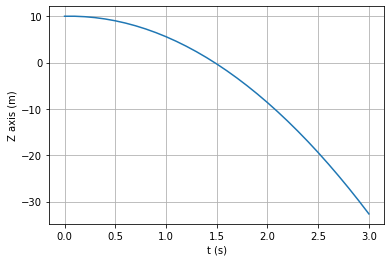

In [16]:
import numpy as np
import matplotlib.pyplot as plt

### simulation parameters

g = 9.81 #ms^-2
m  = 1 #kg

tf = 3.
dt = 0.1    
time = np.linspace(0.,tf, int(tf / dt) + 1)  # vector time

# Initial conditions
x = np.array([0.,10, 0., 0.])
dx = np.zeros(4)

x_log = [np.copy(x)]

for t in time[1:]:
    
    # Total force 
    f_T = -m*g
    
    # Dynamics
    dx[:2] = x[2:]
    dx[2] = 0
    dx[3] = f_T/m  # effect of the gravity in the acceleration in body 
    
    # Euler integration
    x = x + dx*dt 
    x_log.append(np.copy(x))
    
x_log = np.array(x_log)

f,a=plt.subplots()
a.plot(time, x_log[:,1])
a.set_ylabel('Z axis (m)')
a.set_xlabel('t (s)')
plt.grid()

In [15]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()


def animate(t):
    ax.clear()
    
    # Path
    ax.plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    ax.plot(x_log[t,0], x_log[t,1], 'bo')
        
plt.close()
anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)
HTML(anim.to_jshtml())

# altitud control 

dynamics and control input to the system

$$
\mathbf{\dot x} = \begin{bmatrix}
\dot y\\
\dot z\\
0 \\
-mg
\end{bmatrix}
+
\begin{bmatrix}
 \mathbf{0}\\
 \mathbf{0}\\
 \mathbf{0}\\
 \mathbf{1}\\
\end{bmatrix}
u
.
$$

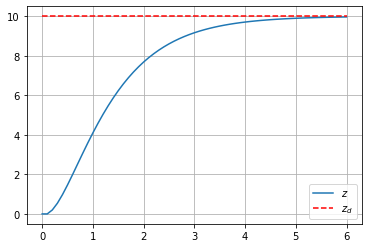

In [20]:
tf = 6.
time = np.linspace(0.,tf, int(tf / dt) + 1)  # Time vector

# Desired high
z_d = 10
vz_d = 0

# Gains
kp, kd = 2, 3

# Initial conditions
x = np.array([0,0, 0., 0.])
dx = np.zeros(4)

x_log = [np.copy(x)]

for t in time[1:]:
    z = x[1]
    vz = x[3]
    
    # Total force 
    f_g = -m*g
    
    u = kp*(z_d - z) + kd*(vz_d - vz) + g
    
    # Dynamics
    dx[:2] = x[2:]
    dx[3] = f_g / m + u 
    
    # Euler integration
    x = x + dx*dt 
    x_log.append(np.copy(x))
    
x_log = np.array(x_log)

plt.plot(time, x_log[:,1], label='$z$')
# desired
plt.plot(time[[0,-1]], [z_d, z_d], 'r--', label='$z_d$')
plt.grid()
plt.legend()
plt.show()

In [23]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()


def animate(t):
    ax.clear()
    
    # Path
    ax.plot(x_log[:,0], x_log[:,1], 'r--', linewidth=0.5)
    
    # Initial conditions
    ax.plot(x_log[t,0], x_log[t,1], 'bo')
        
plt.close()
anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)
HTML(anim.to_jshtml())
